In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

###1.Tampilkan rata - rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka

untuk menampilkan kita menggunakan command .describe()

In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


###2.Tampilkan 10 record pertama dari dataset dengan atribute bertipe angka

filter hanya kolom yang bertipe data numerik saja yang akan ditampilkan

In [8]:
kolom_numerik = data.select_dtypes(include=['float', 'int'])

data yang sudah difilter, beri command .head() untuk menampilkan data teratas dan beri parameter 10 karna yang mau di tampilkan adalah 10 data teratas

In [9]:
kolom_numerik.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1
7,79.0,0,0,23.86,5.7,85,0
8,42.0,0,0,33.64,4.8,145,0
9,32.0,0,0,27.32,5.0,100,0


###3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka

Menampilkan informasi tentang jumlah record, jumlah atribut, dan nama atribut

In [10]:
jumlah_record = data.shape[0]
jumlah_atribut = data.shape[1]
nama_atribut = list(data.columns)

Menghitung jumlah atribut dengan tipe data angka

In [11]:
kolom_numerik = data.select_dtypes(include=['float', 'int']).columns
jumlah_atribut_numerik = len(kolom_numerik)

Menampilkan Jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka, attribute bertipe angka

In [12]:
print(f"Jumlah record: {jumlah_record}")
print(f"Jumlah attribute: {jumlah_atribut}")

print("Nama attribute:")
for nama in nama_atribut:
    print(f"- {nama}")

print(f"Jumlah attribute dengan tipe angka: {jumlah_atribut_numerik}")

print("Attribute bertipe angka:")
for kolom in kolom_numerik:
    print(f"- {kolom}")

Jumlah record: 100000
Jumlah attribute: 9
Nama attribute:
- gender
- age
- hypertension
- heart_disease
- smoking_history
- bmi
- HbA1c_level
- blood_glucose_level
- diabetes
Jumlah attribute dengan tipe angka: 7
Attribute bertipe angka:
- age
- hypertension
- heart_disease
- bmi
- HbA1c_level
- blood_glucose_level
- diabetes


### 4. Tampilkan jumlah label dari semua attribute yang bernilai object

Mencari attribute bertipe object

In [13]:
kolom_objek = data.select_dtypes(include=['object']).columns

In [14]:
print("Jumlah label unik dari attribute bertipe object:")
for kolom in kolom_objek:
    jumlah_label = data[kolom].nunique()
    print(f"- {kolom}: {jumlah_label} label unik")

Jumlah label unik dari attribute bertipe object:
- gender: 3 label unik
- smoking_history: 6 label unik


untuk menghitung jumlah label dalam atribut menggunakan .value_counts()

In [15]:
data['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [16]:
data['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


###5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.

Menghitung jumlah kasus diabetes (0 = Tidak Diabetes, 1 = Diabetes)

In [27]:
diabetes_counts = data['diabetes'].value_counts()

Membuat pie chart untuk kolom target "Diabetes" menggunakan .pie()

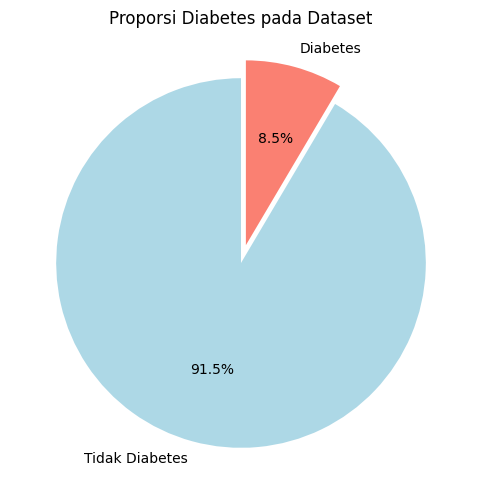

In [28]:
plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=['Tidak Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90, explode=[0, 0.1])
plt.title('Proporsi Diabetes pada Dataset')
plt.show()

Pie chart ini akan menunjukkan persentase individu yang didiagnosis diabetes dibandingkan dengan yang tidak didiagnosis dalam dataset. Grafik ini memudahkan kita untuk melihat proporsi antara dua kelompok ini, dan jika salah satu kelompok mendominasi, kita bisa melihatnya dengan jelas.

###6.Tampilkan korelasi dataset menggunakan heatmap.

filter hanya kolom yang bertipe data numerik saja yang akan ditampilkan

In [18]:
kolom_numerik = data.select_dtypes(include=['float', 'int'])

.corr() digunakan untuk Menghitung matriks korelasi dari variabel numerik dalam dataset.

In [19]:
korelasi = kolom_numerik.corr()

Menampilkan heatmap menggunakan seaborn

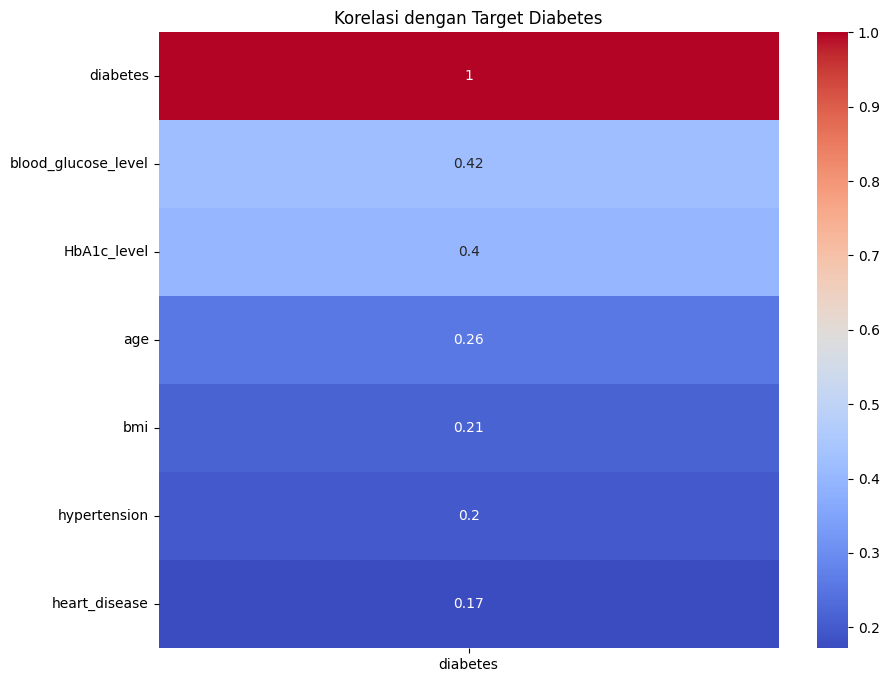

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi[['diabetes']].sort_values(by='diabetes', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi dengan Target Diabetes')
plt.show()

Berdasarkan heatmap, Korelasi dengan variabel Diabetes membantu kita lebih memahami faktor-faktor yang memengaruhi risiko diabetes. Kadar gula darah (glukosa) dan HbA1c kemungkinan merupakan indikator paling penting untuk mengetahui apakah seseorang berisiko terkena diabetes. Sementara itu, faktor lain seperti usia dan BMI (indeks massa tubuh) juga punya pengaruh, tapi tidak sekuat kadar gula darah.